# Pathway and full outcome models

In [1]:
# import required modules
import numpy as np
import pandas as pd
from math import sqrt
from scipy import stats

from classes.pathway import SSNAP_Pathway
from classes.clinical_outcome import Clinical_outcome

## Import data

Probability distributions of modified Rankin scale (mRS):

In [2]:
mrs_dists = pd.read_csv('data/mrs_dist_probs_cumsum.csv', index_col='Stroke type')

In [3]:
mrs_dists

,0,1,2,3,4,5,6
Stroke type,,,,,,,
pre_stroke_nlvo,0.582881,0.745419,0.848859,0.951082,0.993055,1.000000,1.0
pre_stroke_nlvo_ivt_deaths,0.576469,0.737219,0.839522,0.940620,0.982131,0.989000,1.0
pre_stroke_lvo,0.417894,0.560853,0.679283,0.843494,0.957269,1.000000,1.0
pre_stroke_lvo_ivt_deaths,0.403644,0.541728,0.656119,0.814731,0.924626,0.965900,1.0
pre_stroke_lvo_mt_deaths,0.402850,0.540662,0.654829,0.813128,0.922807,0.964000,1.0
no_treatment_nlvo,0.197144,0.460000,0.580032,0.707768,0.855677,0.917702,1.0
no_effect_nlvo_ivt_deaths,0.197271,0.460000,0.577583,0.702252,0.845244,0.904454,1.0
t0_treatment_nlvo_ivt,0.429808,0.630000,0.738212,0.848427,0.929188,0.956300,1.0
no_treatment_lvo,0.050000,0.129000,0.265000,0.429000,0.676000,0.811000,1.0


Hospital performance parameters:

In [4]:
hospital_performance = pd.read_csv('data/hospital_performance_thrombectomy.csv')

In [5]:
hospital_performance.head(5).T

,0,1,2,3,4
stroke_team,Addenbrooke's Hospital,Basildon University Hospital,Blackpool Victoria Hospital,Broomfield Hospital,Calderdale Royal Hospital
admissions,602.166667,486.5,485.833333,452.166667,634.666667
proportion_of_all_with_ivt,0.149184,0.132237,0.091938,0.104681,0.135504
proportion_of_all_with_mt,0.026571,0.01199,0.01235,0.006635,0.00604
proportion_of_mt_with_ivt,0.520833,0.6,0.444444,0.555556,0.73913
proportion1_of_all_with_onset_known_ivt,0.590645,0.648167,0.44837,0.558791,0.546218
proportion2_of_mask1_with_onset_to_arrival_on_time_ivt,0.679007,0.57241,0.693191,0.605541,0.645673
proportion3_of_mask2_with_arrival_to_scan_on_time_ivt,0.94893,0.958449,0.941501,0.991285,0.946389
proportion4_of_mask3_with_onset_to_scan_on_time_ivt,0.845818,0.888247,0.888628,0.915385,0.929976
proportion5_of_mask4_with_enough_time_to_treat_ivt,1.0,1.0,1.0,1.0,1.0


# Run trials

## Same hospital, multiple trials of the pathway

In [6]:
# Set general model parameters
trials = 4

# Get data for one hospital
hospital_name = hospital_performance.iloc[0]['stroke_team']
hospital_data = hospital_performance.iloc[0]

patient_array = SSNAP_Pathway(hospital_name, hospital_data)
for trial in range(trials):
    patient_array.run_trial()  # patients_per_run=100)

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Show the results for the first few patients in the latest trial:

In [7]:
patient_array.results_dataframe.head(10).T

,0,1,2,3,4,5,6,7,8,9
onset_time_known_bool,True,False,False,True,True,True,False,True,False,False
onset_to_arrival_mins,99.0,NaN,NaN,60.0,481.0,149.0,NaN,63.0,NaN,NaN
onset_to_arrival_on_time_ivt_bool,True,False,False,True,False,True,False,True,False,False
onset_to_arrival_on_time_mt_bool,True,False,False,True,False,True,False,True,False,False
arrival_to_scan_mins,106.0,185.0,62.0,21.0,97.0,93.0,84.0,78.0,50.0,36.0
arrival_to_scan_on_time_ivt_bool,True,True,True,True,True,True,True,True,True,True
arrival_to_scan_on_time_mt_bool,True,True,True,True,True,True,True,True,True,True
onset_to_scan_mins,205.0,NaN,NaN,81.0,578.0,242.0,NaN,141.0,NaN,NaN
onset_to_scan_on_time_ivt_bool,True,False,False,True,False,False,False,True,False,False
time_left_for_ivt_after_scan_mins,65.0,NaN,NaN,189.0,-0.0,28.0,NaN,129.0,NaN,NaN


In [8]:
patient_array.results_dataframe.columns

Index(['onset_time_known_bool', 'onset_to_arrival_mins',
       'onset_to_arrival_on_time_ivt_bool', 'onset_to_arrival_on_time_mt_bool',
       'arrival_to_scan_mins', 'arrival_to_scan_on_time_ivt_bool',
       'arrival_to_scan_on_time_mt_bool', 'onset_to_scan_mins',
       'onset_to_scan_on_time_ivt_bool', 'time_left_for_ivt_after_scan_mins',
       'enough_time_for_ivt_bool', 'ivt_chosen_bool', 'scan_to_needle_mins',
       'onset_to_needle_mins', 'ivt_mask1_onset_known',
       'ivt_mask2_mask1_and_onset_to_arrival_on_time',
       'ivt_mask3_mask2_and_arrival_to_scan_on_time',
       'ivt_mask4_mask3_and_onset_to_scan_on_time',
       'ivt_mask5_mask4_and_enough_time_to_treat',
       'ivt_mask6_mask5_and_treated', 'onset_to_scan_on_time_mt_bool',
       'time_left_for_mt_after_scan_mins', 'enough_time_for_mt_bool',
       'mt_chosen_bool', 'scan_to_puncture_mins', 'onset_to_puncture_mins',
       'mt_mask1_onset_known', 'mt_mask2_mask1_and_onset_to_arrival_on_time',
       'mt_mas

In [9]:
patient_array.results_dataframe.values

array([[True, 99.0, True, ..., True, False, 1],
       [False, nan, False, ..., False, False, 1],
       [False, nan, False, ..., False, False, 1],
       ...,
       [True, 146.0, True, ..., True, False, 1],
       [False, nan, False, ..., False, False, 1],
       [True, 188.0, True, ..., True, False, 2]], dtype=object)

In [10]:
patient_array.results_dataframe.to_csv('full_outcome_pathway_trial_example_results.csv')

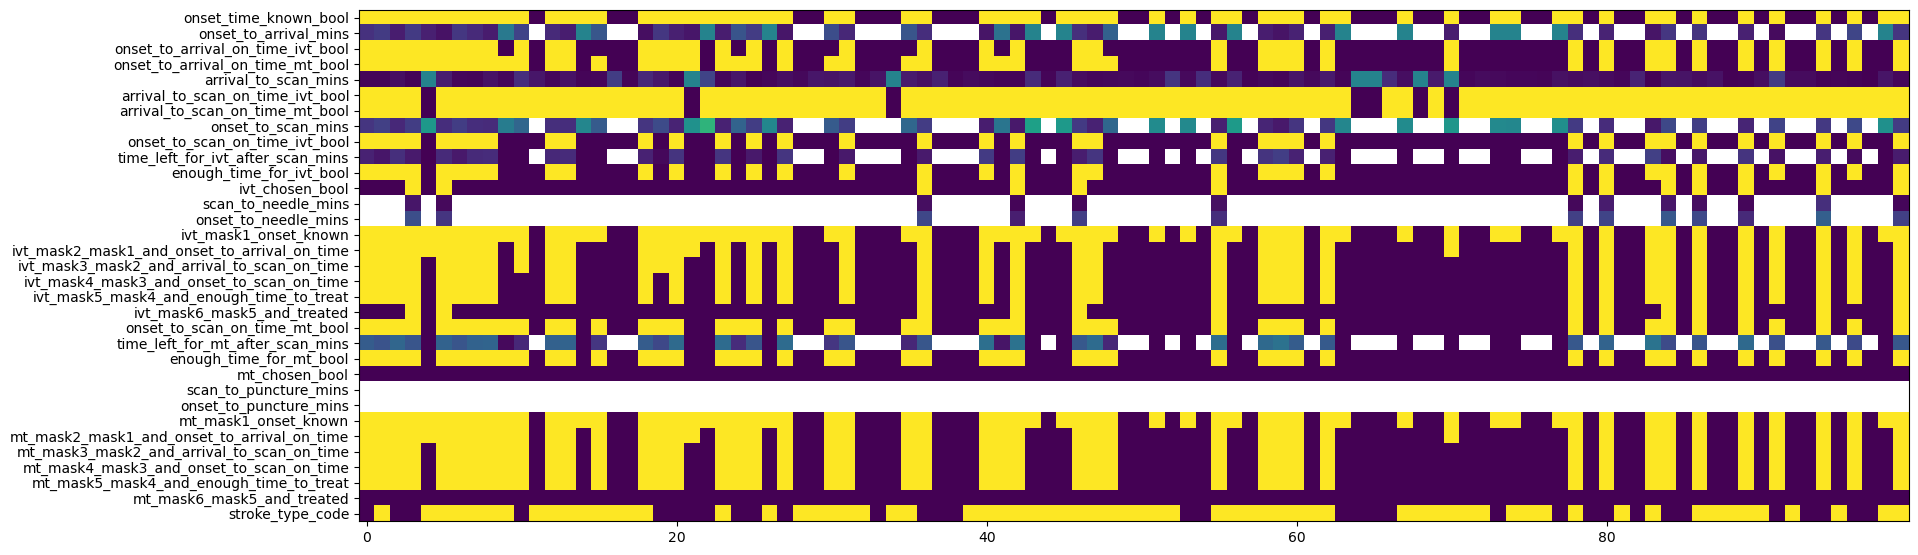

In [39]:
import matplotlib.pyplot as plt 

grid = patient_array.results_dataframe.values

grid[np.where(grid == True)] = np.nanmax(grid)
grid[np.where(grid == False)] = np.nanmin(grid)

grid = np.array(grid, dtype=float)

fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(grid.T[:, :100])
ax.set_yticks(np.arange(0, grid.shape[1]))
ax.set_yticklabels(patient_array.results_dataframe.columns)
plt.show()

Show just the arrival to scan times for each patient in the latest trial:

In [8]:
patient_array.trial['arrival_to_scan_mins'].data

array([  5.,  18., 114., 213.,  44.,  51.,  37.,  77.,  98., 137.,  30.,
        86.,  27.,   9.,  20.,  53.,  31., 481.,  16.,  30.,  45.,   9.,
        16.,  32., 106., 115.,  44.,  18.,  24.,  17.,  62.,  47.,  59.,
        64.,  67.,  84.,  78.,  77.,  36.,  10.,  29.,  13.,  87.,  38.,
        11.,  30., 108., 481., 481.,  21.,  66., 481.,  20.,  85., 112.,
       481., 135.,   6., 107.,  15.,  14.,  61., 178.,  48.,  46.,  72.,
        15.,  23., 481.,  53.,  19.,   6.,  47.,  46.,  50.,  65.,  77.,
        39.,  22., 104.,  42.,  29.,  68.,  47.,  17.,  23.,  40., 215.,
        21.,  18.,  31.,  23.,  24.,  66.,  15., 203.,  42.,  41.,  47.,
       208.,  48.,  41.,  19.,  31.,  50.,  59.,  32.,  52.,  55.,  85.,
        23.,  27.,  32., 162.,  34.,   9.,  44.,  57.,  27.,   6.,  27.,
        26.,  33.,  75.,  36.,  27.,  37.,  23.,  22.,  18., 131.,  32.,
        18.,  29., 129.,  13.,  60.,  42.,  37., 128.,  30.,  50.,  42.,
       481.,  13.,  47., 481.,  33.,  55.,  49.,  1

Show the hospital performance of each trial:

In [9]:
patient_array.df_performance

,Target,Trial_1,Trial_2,Trial_3,Trial_4
stroke_team,Addenbrooke's Hospital,Addenbrooke's Hospital,Addenbrooke's Hospital,Addenbrooke's Hospital,Addenbrooke's Hospital
admissions,602.166667,602,602,602,602
proportion_of_all_with_ivt,0.149184,0.127907,0.166113,0.122924,0.149502
proportion_of_all_with_mt,0.026571,0.024917,0.024917,0.016611,0.023256
proportion_of_mt_with_ivt,0.520833,0.333333,0.666667,0.7,0.5
proportion1_of_all_with_onset_known_ivt,0.590645,0.584718,0.60299,0.536545,0.599668
proportion2_of_mask1_with_onset_to_arrival_on_time_ivt,0.679007,0.707386,0.732782,0.643963,0.686981
proportion3_of_mask2_with_arrival_to_scan_on_time_ivt,0.94893,0.955823,0.943609,0.942308,0.951613
proportion4_of_mask3_with_onset_to_scan_on_time_ivt,0.845818,0.840336,0.828685,0.877551,0.881356
proportion5_of_mask4_with_enough_time_to_treat_ivt,1.0,1.0,1.0,1.0,1.0


## Same hospital, multiple scenarios of the pathway

Make a new pandas dataframe of the hospital performance data for these scenarios:

In [10]:
# Original hospital performance data:
hospital_data_original = hospital_performance.iloc[0]

# Overwrite original hospital performance with these values:
arrival_to_scan_on_time_proportion = 1.0  # -------------------------------------------- placeholder value
onset_time_known_proportion = 1.0         # -------------------------------------------- placeholder value
benchmark_thrombolysis_proportion = 0.8   # -------------------------------------------- placeholder value
benchmark_thrombectomy_proportion = 0.4   # -------------------------------------------- placeholder value

# Scenario changes to the performance data
scenario_dicts = [
    dict(speed=0, onset=0, benchmark=0),  # base
    dict(speed=0, onset=0, benchmark=1),  # benchmark
    dict(speed=0, onset=1, benchmark=0),  # onset
    dict(speed=1, onset=0, benchmark=0),  # speed
    dict(speed=0, onset=1, benchmark=1),  # onset + benchmark
    dict(speed=1, onset=0, benchmark=1),  # speed + benchmark
    dict(speed=1, onset=1, benchmark=0),  # speed + onset
    dict(speed=1, onset=1, benchmark=1),  # speed + onset + benchmark
    ]
    
trials = 10
for d in scenario_dicts:
    # Create a fresh copy of the original performance data
    hospital_data_scenario = hospital_data_original.copy()
    
    # Keep track of which scenarios are used in here:
    scenarios_list = []
    if d['speed'] == 1:
        # Speed scenario
        # All patients are scanned within 4hrs of arrival
        # (how does this work for the masks picking different times for MT and IVT? Someteims 4hr, sometimes 8hr) ---- check this
        for key in ['proportion3_of_mask2_with_arrival_to_scan_on_time_ivt',
                    'proportion3_of_mask2_with_arrival_to_scan_on_time_mt']:
            hospital_data_scenario[key] = arrival_to_scan_on_time_proportion
        scenarios_list.append('speed')
    if d['onset'] == 1:
        # Onset time scenario
        # More patients have their onset time determined
        for key in ['proportion1_of_all_with_onset_known_ivt',
                    'proportion1_of_all_with_onset_known_mt']:
            hospital_data_scenario[key] = onset_time_known_proportion
        scenarios_list.append('onset')
    if d['benchmark'] == 1:
        # Benchmark scenario
        # The proportion of eligible patients receiving treatment is 
        # in line with the benchmark teams' proportions.
        ivt_prop = 'proportion6_of_mask5_with_treated_ivt'
        hospital_data_scenario[ivt_prop] = np.maximum(
            benchmark_thrombolysis_proportion, 
            hospital_data_scenario[ivt_prop])
        mt_prop = 'proportion6_of_mask5_with_treated_mt'
        hospital_data_scenario[mt_prop] = np.maximum(
            benchmark_thrombectomy_proportion, 
            hospital_data_scenario[mt_prop])
        scenarios_list.append('benchmark')
    
    # Build the scenario name from the options selected above.
    # If none of the options are selected, name this scenario "base".
    scenario_name = ('base' if len(scenarios_list) == 0
                     else ' + '.join(scenarios_list))
    
    hospital_name = hospital_data_scenario['stroke_team']
    hospital_label_here = hospital_name + ': ' + scenario_name
    
    hospital_data_scenario.name = scenario_name

    # Store this data in the results dataframe.
    if scenario_name == 'base':
        df_performance_scenarios = hospital_data_scenario.copy()
    else:
        # Combine the two Series into a single DataFrame:
        df_performance_scenarios = pd.merge(
            df_performance_scenarios, hospital_data_scenario,
            right_index=True, left_index=True)
        
# Transpose the dataframe to match the original hospital_performance 
# format:
df_performance_scenarios = df_performance_scenarios.T

In [11]:
df_performance_scenarios.T

,base,benchmark,onset,speed,onset + benchmark,speed + benchmark,speed + onset,speed + onset + benchmark
stroke_team,Addenbrooke's Hospital,Addenbrooke's Hospital,Addenbrooke's Hospital,Addenbrooke's Hospital,Addenbrooke's Hospital,Addenbrooke's Hospital,Addenbrooke's Hospital,Addenbrooke's Hospital
admissions,602.166667,602.166667,602.166667,602.166667,602.166667,602.166667,602.166667,602.166667
proportion_of_all_with_ivt,0.149184,0.149184,0.149184,0.149184,0.149184,0.149184,0.149184,0.149184
proportion_of_all_with_mt,0.026571,0.026571,0.026571,0.026571,0.026571,0.026571,0.026571,0.026571
proportion_of_mt_with_ivt,0.520833,0.520833,0.520833,0.520833,0.520833,0.520833,0.520833,0.520833
proportion1_of_all_with_onset_known_ivt,0.590645,0.590645,1.0,0.590645,1.0,0.590645,1.0,1.0
proportion2_of_mask1_with_onset_to_arrival_on_time_ivt,0.679007,0.679007,0.679007,0.679007,0.679007,0.679007,0.679007,0.679007
proportion3_of_mask2_with_arrival_to_scan_on_time_ivt,0.94893,0.94893,0.94893,1.0,0.94893,1.0,1.0,1.0
proportion4_of_mask3_with_onset_to_scan_on_time_ivt,0.845818,0.845818,0.845818,0.845818,0.845818,0.845818,0.845818,0.845818
proportion5_of_mask4_with_enough_time_to_treat_ivt,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


The following cell is currently copy and pasted from the later cell with minimal changes. So probably need to stick some of this in a function.

In [12]:

# Set general model parameters
trials = 10

# Set up dataframes.

# Record these measures...
outcome_results_columns = [
    'Thrombolysis_rate_(%)',
    'Thrombectomy_rate_(%)',
    'LVO_IVT_mean_shift',
    'LVO_MT_mean_shift',
    'nLVO_IVT_mean_shift',
    # 'onset_to_needle_mins',
    # 'onset_to_puncture_mins'
]

# ... with these stats...
results_types = [
    '_(median)',
    '_(low_5%)',
    '_(high_95%)',
    '_(mean)',
    '_(stdev)',
    '_(95ci)',
]
# ... and gather all combinations of measure and stat here:
results_columns = [column + ending for column in outcome_results_columns
                   for ending in results_types]

# Also store onset to needle time:
# results_columns += ['Onset_to_needle_(mean)']
results_columns += ['onset_to_needle_mins(mean)']
results_columns += ['onset_to_puncture_mins(mean)']


results_df = pd.DataFrame(columns=results_columns)

# trial dataframe is set up each scenario, but define column names here
trial_columns = [
    'Thrombolysis_rate_(%)',
    'Thrombectomy_rate_(%)',
    'LVO_IVT_mean_shift',
    'LVO_MT_mean_shift',
    'nLVO_IVT_mean_shift',
    'onset_to_needle_mins(mean)',
    'onset_to_puncture_mins(mean)'
    ]

# Iterate through hospitals
scenario_counter = 0
for hospital in df_performance_scenarios.iterrows():
    scenario_counter += 1
    print(f'Scenario {scenario_counter}', end='\r')

    # Get data for one hospital
    hospital_name = hospital[1]['stroke_team'] + ': ' + hospital[0]
    hospital_data = hospital[1]

    # Set up trial results dataframe
    trial_df = pd.DataFrame(columns=trial_columns)

    number_of_patients = int(hospital_data['admissions'])

    patient_array = SSNAP_Pathway(hospital_name, hospital_data)
    for trial in range(trials):

        patient_array.run_trial()
        
        # Initiate the outcome model object:
        clinical_outcome = Clinical_outcome(mrs_dists, number_of_patients)
        # Import patient array data:
        for key in clinical_outcome.trial.keys():
            if key in patient_array.trial.keys():
                clinical_outcome.trial[key].data = patient_array.trial[key].data
        
        # Calculate outcomes:
        results_by_stroke_type, patient_array_outcomes = clinical_outcome.calculate_outcomes()
        
        # Mean treatment times:
        # (if/else to prevent mean of empty slice RunTime warning)
        # Treatment times are only not NaN when the patients received treatment.
        onset_to_needle_mins_mean = (
            np.nanmean(patient_array.trial['onset_to_needle_mins'].data) 
            if np.all(np.isnan(patient_array.trial['onset_to_needle_mins'].data)) == False
            else np.NaN)
        onset_to_puncture_mins_mean = (
            np.nanmean(patient_array.trial['onset_to_puncture_mins'].data) 
            if np.all(np.isnan(patient_array.trial['onset_to_puncture_mins'].data)) == False
            else np.NaN)
    
        # Save scenario results to dataframe
        result = [
            np.mean(patient_array.trial['ivt_chosen_bool'].data)*100.0,
            np.mean(patient_array.trial['mt_chosen_bool'].data)*100.0,
            results_by_stroke_type['lvo_ivt_mean_valid_patients_mean_mrs_shift'],
            results_by_stroke_type['lvo_mt_mean_valid_patients_mean_mrs_shift'],
            results_by_stroke_type['nlvo_ivt_mean_valid_patients_mean_mrs_shift'],
            onset_to_needle_mins_mean,
            onset_to_puncture_mins_mean
        ]
        # print('result', result)
        trial_df.loc[trial] = result
        
        # print(stop, here, please)
        
    trial_result = []
    
    # sometimes these medians etc. are calculated when there's only one or two valid values in the column. Should probably do something about that.
    for column in outcome_results_columns:
        results_here = [
            trial_df[column].median(),
            trial_df[column].quantile(0.05),
            trial_df[column].quantile(0.95),
            trial_df[column].mean(),
            trial_df[column].std(),
            (trial_df[column].mean() -
                stats.norm.interval(0.95, loc=trial_df[column].mean(),
                scale=trial_df[column].std() / sqrt(trials))[0]),
        ]
        trial_result += results_here
    trial_result += [
        trial_df['onset_to_needle_mins(mean)'].mean()
        if np.all(np.isnan(trial_df['onset_to_needle_mins(mean)'])) == False
        else np.NaN]
    trial_result += [
        trial_df['onset_to_puncture_mins(mean)'].mean()
        if np.all(np.isnan(trial_df['onset_to_puncture_mins(mean)'])) == False
        else np.NaN]
    
    # add scenario results to results dataframe
    results_df.loc[hospital_name] = trial_result
    

# # Apply calibration
# results_df['calibration'] = calibration
# for col in list(results_df):
#     if 'Percent_Thrombolysis' in col or 'Additional_good_outcomes' in col:
#         results_df[col] *= calibration

# round all results to 2 decimal places and return
# results_df = results_df.round(2)
# return (results_df)


In [13]:
results_df.head(10).T

,Addenbrooke's Hospital: base,Addenbrooke's Hospital: benchmark,Addenbrooke's Hospital: onset,Addenbrooke's Hospital: speed,Addenbrooke's Hospital: onset + benchmark,Addenbrooke's Hospital: speed + benchmark,Addenbrooke's Hospital: speed + onset,Addenbrooke's Hospital: speed + onset + benchmark
Thrombolysis_rate_(%)_(median),14.700997,26.744186,24.833887,15.116279,44.601329,27.906977,27.325581,48.754153
Thrombolysis_rate_(%)_(low_5%),12.774086,23.720930,21.619601,13.787375,42.475083,25.074751,23.388704,45.141196
Thrombolysis_rate_(%)_(high_95%),16.038206,29.019934,26.669435,16.794020,49.169435,29.418605,28.181063,51.602990
Thrombolysis_rate_(%)_(mean),14.468439,26.478405,24.335548,15.083056,45.498339,27.641196,26.079734,48.521595
Thrombolysis_rate_(%)_(stdev),1.306685,1.972016,1.873226,1.112392,2.471866,1.614708,2.109918,2.406505
Thrombolysis_rate_(%)_(95ci),0.809877,1.222246,1.161016,0.689455,1.532051,1.000788,1.307717,1.491540
Thrombectomy_rate_(%)_(median),2.408638,17.524917,3.571429,2.242525,31.229236,18.604651,4.152824,31.976744
Thrombectomy_rate_(%)_(low_5%),1.403654,16.486711,2.956811,1.644518,30.473422,16.503322,3.031561,30.606312
Thrombectomy_rate_(%)_(high_95%),2.948505,19.277409,4.742525,3.480066,33.089701,20.647841,5.000000,34.269103
Thrombectomy_rate_(%)_(mean),2.242525,17.641196,3.770764,2.358804,31.445183,18.704319,4.069767,32.259136


## All hospitals, multiple trials and outcomes

This needs tidying up

In [17]:

# Set general model parameters
trials = 100

# Set up dataframes.

# Record these measures...
outcome_results_columns = [
    'Thrombolysis_rate_(%)',
    'Thrombectomy_rate_(%)',
    'LVO_IVT_mean_shift',
    'LVO_MT_mean_shift',
    'nLVO_IVT_mean_shift',
    # 'onset_to_needle_mins',
    # 'onset_to_puncture_mins'
]

# ... with these stats...
results_types = [
    '_(median)',
    '_(low_5%)',
    '_(high_95%)',
    '_(mean)',
    '_(stdev)',
    '_(95ci)',
]
# ... and gather all combinations of measure and stat here:
results_columns = [column + ending for column in outcome_results_columns
                   for ending in results_types]

# Also store onset to needle time:
# results_columns += ['Onset_to_needle_(mean)']
results_columns += ['onset_to_needle_mins(mean)']
results_columns += ['onset_to_puncture_mins(mean)']


results_df = pd.DataFrame(columns=results_columns)

# trial dataframe is set up each scenario, but define column names here
trial_columns = [
    'Thrombolysis_rate_(%)',
    'Thrombectomy_rate_(%)',
    'LVO_IVT_mean_shift',
    'LVO_MT_mean_shift',
    'nLVO_IVT_mean_shift',
    'onset_to_needle_mins(mean)',
    'onset_to_puncture_mins(mean)'
    ]

# Iterate through hospitals
scenario_counter = 0
for hospital in hospital_performance.iterrows():
    scenario_counter += 1
    print(f'Scenario {scenario_counter}', end='\r')

    # Get data for one hospital
    hospital_name = hospital[1]['stroke_team']
    hospital_data = hospital[1]

    # Set up trial results dataframe
    trial_df = pd.DataFrame(columns=trial_columns)

    number_of_patients = int(hospital_data['admissions'])

    patient_array = SSNAP_Pathway(hospital_name, hospital_data)
    for trial in range(trials):

        patient_array.run_trial()
        
        # Initiate the outcome model object:
        clinical_outcome = Clinical_outcome(mrs_dists, number_of_patients)
        # Import patient array data:
        for key in clinical_outcome.trial.keys():
            if key in patient_array.trial.keys():
                clinical_outcome.trial[key].data = patient_array.trial[key].data
        
        # Calculate outcomes:
        results_by_stroke_type, patient_array_outcomes = clinical_outcome.calculate_outcomes()
        
#         # mask = (
#         #     patient_array.patient_array_thrombolysis_conditions_met_bool == 1)
#         # onset_to_needle_mins_masked = \
#         #         patient_array.patient_array_onset_to_needle_mins[mask].mean()

        # Mean treatment times:
        # (if/else to prevent mean of empty slice RunTime warning)
        # Treatment times are only not NaN when the patients received treatment.
        onset_to_needle_mins_mean = (
            np.nanmean(patient_array.trial['onset_to_needle_mins'].data) 
            if np.all(np.isnan(patient_array.trial['onset_to_needle_mins'].data)) == False
            else np.NaN)
        onset_to_puncture_mins_mean = (
            np.nanmean(patient_array.trial['onset_to_puncture_mins'].data) 
            if np.all(np.isnan(patient_array.trial['onset_to_puncture_mins'].data)) == False
            else np.NaN)
    
        # Save scenario results to dataframe
        result = [
            np.mean(patient_array.trial['ivt_chosen_bool'].data)*100.0,
            np.mean(patient_array.trial['mt_chosen_bool'].data)*100.0,
            results_by_stroke_type['lvo_ivt_mean_valid_patients_mean_mrs_shift'],
            results_by_stroke_type['lvo_mt_mean_valid_patients_mean_mrs_shift'],
            results_by_stroke_type['nlvo_ivt_mean_valid_patients_mean_mrs_shift'],
            onset_to_needle_mins_mean,
            onset_to_puncture_mins_mean
        ]
        # print('result', result)
        trial_df.loc[trial] = result
        
        # print(stop, here, please)
        
    trial_result = []
    
    # sometimes these medians etc. are calculated when there's only one or two valid values in the column. Should probably do something about that.
    for column in outcome_results_columns:
        results_here = [
            trial_df[column].median(),
            trial_df[column].quantile(0.05),
            trial_df[column].quantile(0.95),
            trial_df[column].mean(),
            trial_df[column].std(),
            (trial_df[column].mean() -
                stats.norm.interval(0.95, loc=trial_df[column].mean(),
                scale=trial_df[column].std() / sqrt(trials))[0]),
        ]
        trial_result += results_here
    trial_result += [
        trial_df['onset_to_needle_mins(mean)'].mean()
        if np.all(np.isnan(trial_df['onset_to_needle_mins(mean)'])) == False
        else np.NaN]
    trial_result += [
        trial_df['onset_to_puncture_mins(mean)'].mean()
        if np.all(np.isnan(trial_df['onset_to_puncture_mins(mean)'])) == False
        else np.NaN]
    
    # add scenario results to results dataframe
    results_df.loc[hospital_name] = trial_result
    

# # Apply calibration
# results_df['calibration'] = calibration
# for col in list(results_df):
#     if 'Percent_Thrombolysis' in col or 'Additional_good_outcomes' in col:
#         results_df[col] *= calibration

# round all results to 2 decimal places and return
# results_df = results_df.round(2)
# return (results_df)


/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: Run

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: Run

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: Run

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: Run

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: Run

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: Run

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: Run

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: Run

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: Run

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: Run

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: Run

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: Run

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: Run

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: Run

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: Run

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: Run

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: Run

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: Run

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: Run

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: Run

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: Run

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: Run

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: Run

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: Run

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: Run

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: Run

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: Run

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: Run

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: Run

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: Run

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: Run

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: Run

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: Run

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: Run

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: Run

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: Run

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: Run

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: Run

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: Run

/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: Run

n.b. runtime warning about multiply error a * scale + loc is something to do with the above cell, not either of the pathway or outcome classes it's calling. Maybe that stats.norm.interval() line at the end?

In [18]:
results_df.head(10).T

,Addenbrooke's Hospital,Basildon University Hospital,Blackpool Victoria Hospital,Broomfield Hospital,Calderdale Royal Hospital,Charing Cross Hospital HASU,Colchester General Hospital,Countess of Chester Hospital,Darent Valley Hospital,Derriford Hospital
Thrombolysis_rate_(%)_(median),14.202658,13.477366,8.453608,10.840708,13.880126,13.372093,10.388350,12.861736,11.178248,10.958904
Thrombolysis_rate_(%)_(low_5%),12.275748,10.905350,6.381443,8.174779,11.498423,11.046512,8.339806,9.967846,8.157100,9.589041
Thrombolysis_rate_(%)_(high_95%),16.619601,16.255144,10.927835,12.831858,16.719243,15.513566,12.436893,15.755627,14.214502,12.937595
Thrombolysis_rate_(%)_(mean),14.378738,13.545267,8.546392,10.705752,13.981073,13.432171,10.400000,12.909968,11.347432,11.143075
Thrombolysis_rate_(%)_(stdev),1.513512,1.592493,1.392071,1.436512,1.557167,1.418703,1.299877,2.009013,1.911379,1.033065
Thrombolysis_rate_(%)_(95ci),0.296643,0.312123,0.272841,0.281551,0.305199,0.278061,0.254771,0.393759,0.374623,0.202477
Thrombectomy_rate_(%)_(median),2.159468,1.028807,0.824742,0.663717,0.630915,4.069767,0.582524,1.446945,0.302115,3.044140
Thrombectomy_rate_(%)_(low_5%),1.162791,0.411523,0.206186,0.210177,0.157729,2.713178,0.184466,0.627010,0.000000,2.130898
Thrombectomy_rate_(%)_(high_95%),3.156146,1.851852,1.649485,1.327434,1.261830,5.426357,1.165049,3.215434,1.208459,3.957382
Thrombectomy_rate_(%)_(mean),2.191030,1.078189,0.890722,0.623894,0.594637,4.056202,0.582524,1.575563,0.507553,3.070015


In [19]:
results_df.to_csv('full_outcome_pathway_results_refactored.csv')